In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve2d
import imageio
%matplotlib inline

In [64]:
N = 60        # Grid will be N x N
R = 0.6       # Similarity threshold 
Vacant = 0.1  # Fraction of vacant cells
BtoW = 1      # Ratio of black to white people

K = np.array([[1, 1, 1],  
              [1, 0, 1],
              [1, 1, 1]]) #convolution kernel

In [13]:
#White = -1
#Black = 1
#Vacant = 0

In [14]:
def distribution(N, BtoW, Vacant):
    
    vacant = int(N * N * Vacant)
    population = N * N - vacant
    black = int(population * 1 / (1 + 1/BtoW))
    white = population - black
    M = np.zeros(N*N)
    M[:black] = 1
    M[-white:] = -1
    np.random.shuffle(M)
    return M.reshape(N,N)

In [62]:
def evolution(M, K, R, boundary='wrap'):

    kws = dict(mode=mode, boundary=boundary)
    
    #computing different neighbours for each cell
    black_neighbours = convolve2d(M == 1, K, **kws)
    white_neighbours = convolve2d(M == -1, K, **kws)
    any_neighbours   = convolve2d(M != 0,  K, **kws)
    
    #computing dissatified cells
    black_dissatified = (black_neighbours / any_neighbours < R) & (M == 1)
    white_dissatified = (white_neighbours / any_neighbours < R) & (M == -1)
    
    #freeing the dissatified cells
    M[black_dissatified | white_dissatified] = 0
    vacant = (M == 0).sum()

    
    number_black_dissatified, number_white_dissatified = black_dissatified.sum(), white_dissatified.sum()
    filling = np.zeros(vacant)
    filling[:number_black_dissatified] = 1
    filling[number_black_dissatified:number_black_dissatified + number_white_dissatified] = -1
    np.random.shuffle(filling)
    M[M==0] = filling
    
    return M, number_black_dissatified+number_white_dissatified

In [63]:
def pic(M,name):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_aspect('auto')
    ax.imshow(M, interpolation='nearest', cmap=cm.Greys)

    # Major ticks
    ax.set_xticks(np.arange(0, N, 1))
    ax.set_yticks(np.arange(0, N, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, N+1, 1))
    ax.set_yticklabels(np.arange(1, N+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-.599, N, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='#000000', linestyle='-', linewidth=0.5)
    plt.xticks([])
    plt.yticks([])
    
    fig.savefig(name)
    plt.close(fig);

In [66]:
R = [0,1/8,2/8,3/8,4/8,5/8,6/8,7/8,1]

In [18]:
inp = dict()
for ind, val in enumerate(R):
    inp[ind] = val
    

In [38]:
plt.ioff()
for i in range(len(R)):
    files = list()
    M = distribution(N, BtoW, Vacant)
    pic(M,f'R_{inp[i]}_0animation.png')
    files.append(f'R_{inp[i]}_0animation.png')
    
    for j in range(1,7):
        M,_ = evolution(M,K,R=inp[i])
        pic(M,f'R_{inp[i]}_{j}animation.png')
        files.append(f'R_{inp[i]}_{j}animation.png')
        
    images = list()
    for file in files:
        images.append(imageio.imread(file))
    imageio.mimsave(f'schel_R_{inp[i]}.gif', images, fps = 2);


C:\Users\ivang\AppData\Local\Temp\ipykernel_10244\68387797.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


In [55]:
iterations = 15
result = np.zeros((len(R),iterations))

M = distribution(N, BtoW, Vacant)
for ind, r in enumerate(R):
    for i in range(iterations):
        M, vac = evolution(M,K,R = r)
        result[ind,i] = vac

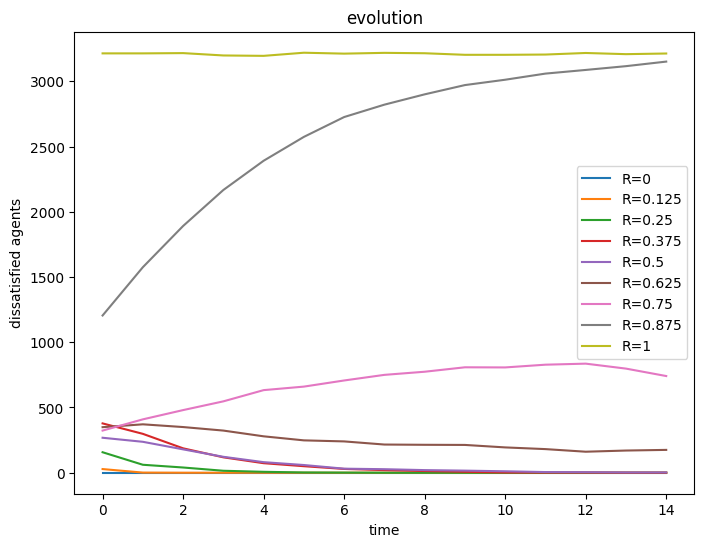

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(R)):
    ax.plot(range(iterations),result[i,:],label=f'R={R[i]}')
plt.legend()
plt.title('evolution')
plt.xlabel('time')
plt.ylabel('dissatisfied agents');